<a href="https://colab.research.google.com/github/punkmic/unsupervised-Sentiment-Analysis---Comparisen-analysis/blob/master/Unsupervised_Sentiment_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro**

## **Install Dependecies**

In [1]:
%%capture
# install dependecies here
#!pip install langdetect  # for language detection
#!pip install diagrams # for visualize the workflow
#!pip install graphviz # for visualize the workflow
#!pip install Pillow # for image manipulation
!pip install textblob # for unsupervised sentiment analysis
!pip install wordcloud # for wordcloud plot
!pip install matplotlib # for plot
!pip install nltk # for natural language prepocessing
!pip install enelvo # for fix slangs, abbreviations, spelling errors
!pip install gensim # for topic modeling 
!pip install tabulate # for print as table
#!pip install transformers # for machine learning
!pip install numpy==1.21.6 # for mathematical
!pip install pyldavis # for model visualization
!pip install scikit-learn # machine learning

## **Load Depencies**

In [50]:
%%capture
# load dependecies here
#from langdetect import detect as dt
#from diagrams import Diagram as dg
#from PIL import Image
import pandas as pd
import os 
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import itertools
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
sw = nltk.corpus.stopwords.words('portuguese')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")
from nltk.tokenize import RegexpTokenizer
wnl = WordNetLemmatizer()
import scipy
from scipy import spatial
import re
from textblob import TextBlob
from textblob import Word
import gensim
from gensim.models import Word2Vec
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.cluster
from sklearn.cluster import KMeans
from enelvo.normaliser import Normaliser
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()
import warnings
import IPython
warnings.filterwarnings("ignore", category=DeprecationWarning)
# We need this dataset in order to use the tokenizer


## **Load Dataset**

### **Clone Github repository** 

In [3]:
# Files cloned from github may not automatically appear in files tab in this case right click and choose update
# this will update our files.
!git clone https://github.com/punkmic/unsupervised-Sentiment-Analysis---Comparisen-analysis.git
%cd /content/unsupervised-Sentiment-Analysis---Comparisen-analysis
!ls

Cloning into 'unsupervised-Sentiment-Analysis---Comparisen-analysis'...
remote: Enumerating objects: 14299, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 14299 (delta 45), reused 82 (delta 29), pack-reused 14181
Receiving objects: 100% (14299/14299), 107.45 MiB | 23.02 MiB/s, done.
Resolving deltas: 100% (1193/1193), done.
Checking out files: 100% (13642/13642), done.
/content/unsupervised-Sentiment-Analysis---Comparisen-analysis
app.py		   Drivers  Makefile	 README.md	   results
clear_datasets.py  LICENSE  __pycache__  requirements.txt  webscraping.py


In [ ]:
# !git pull 

### **Load csv file**

In [4]:
PATH_TO_CSV = '/content/unsupervised-Sentiment-Analysis---Comparisen-analysis/results/web_scraping_results.csv'
df = pd.read_csv(PATH_TO_CSV, encoding='utf-8')
# lower colnames 
df.rename(columns={'Title':'title', 'Body':'body'}, inplace=True)

### **EDA**

In [5]:
print(f'Number of rows {df.shape[0]} \nNumber of columns {df.shape[1]}')

Number of rows 10 
Number of columns 2


In [ ]:
print(df.dtypes)

title    object
body     object
dtype: object


In [ ]:
from numpy import mean, median
text_length_list = df['body'].map(lambda x: len(x))
mean = mean(text_length_list)
median = median(text_length_list)
stats = df.describe(include='all')
print (f'Mean of sentences length: {mean} \nMedian of sentences length: {median} \n\n{stats}')

Mean of sentences length: 448.7 
Median of sentences length: 448.0 

                                                    title  \
count                                                  10   
unique                                                 10   
top     Recebi um e-mail que parte do pedido não foi p...   
freq                                                    1   

                                                     body  
count                                                  10  
unique                                                 10  
top     Olá!Preciso da ajuda de vocês para entender qu...  
freq                                                    1  


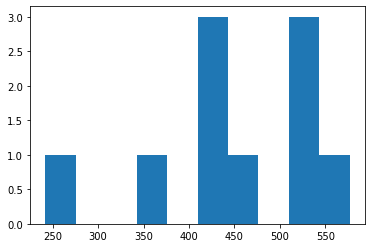

In [ ]:
plt.hist(text_length_list)
plt.show()

## **Plot wordcloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# print currently directory
!pwd

/content/unsupervised-Sentiment-Analysis---Comparisen-analysis


In [ ]:
%%capture
# Create and generate a word cloud image:
text = str(df['body']).title()
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(text)

# Save wordcloud 
if not os.path.exists("wordclouds/raw/"):
  os.makedirs("wordclouds/raw/")
wordcloud.to_file('wordclouds/raw/body_wordcloud.png')

# Display wordcloud
plt.figure()
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## **Text Pre-Processing**

Guide
* Lower Case conversion
* Removing Punctuations
* Stop Words Removal
* Rare Words Removal
* Spelling correction
* Tokenization
* Lemmatization



### **Apply enelvo - Normalize noisy words, lowercase the words and remove punctuation.**
Enelvo is a tool for normalising noisy words in user-generated content written in Portuguese -- such as tweets, blog posts, and product reviews. It is capable of identifying and normalising spelling mistakes, internet slang, acronyms, proper nouns, and others.

In [6]:
norm = Normaliser(tokenizer='readable', sanitize=True)
stemmer = SnowballStemmer('portuguese')

### **Process text**

In [7]:
def text_processing(df):
   # lower text
   df['body']= df['body'].apply(lambda x: ' '.join([x.lower() for x in x.split()]))
   # removal of stop words
   df['body'] = df['body'].apply(lambda x: ' '.join([x for x in x.split() if x not in sw]))
   # spelling Correction
   df['body'] = df['body'].apply(lambda x: norm.normalise(x) )
   # remove punctuations
   df['body'] = df['body'].str.replace('[^\w\s]', '')
   # removal of Numeric
   df['body'] = df['body'].str.replace('[0-9]', '')
   return df

In [8]:
df = text_processing(df)
df['body'][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


'olá preciso ajuda entender problema recebi email uns itens pagos fiz compra valor ar   cobrado cartão verificar itens deste pedido aparece valor ar   então parece pago dizem foi tão puderem estornar valor cobrado precisa enviar sabonetes obrigada'

## **Feature engineer**

### **Count vectors**

In [9]:
cv = CountVectorizer()
cv.fit(df['body'])
cv_tedfeatures = cv.transform(df['body'])
print(f"samples: {cv_tedfeatures.shape[0]}, features: {cv_tedfeatures.shape[1]}")
print()
df_bow_sklearn = pd.DataFrame(cv_tedfeatures.toarray(),columns=cv.get_feature_names_out())
df_bow_sklearn.head()

samples: 10, features: 279



,absolutamente,acer,acessar,acesso,acordo,ado,agora,agosto,aguardo,ai,...,vem,venho,verificar,verificação,video,vier,vieram,vinculada,volta,vídeos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,2,0,0,1,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### **TF-IDF Vectors**

In [10]:
tv = TfidfVectorizer()
tv.fit(df['body'])
tv_tedfeatures = tv.transform(df['body'])
print(f"samples: {tv_tedfeatures.shape[0]}, features: {tv_tedfeatures.shape[1]}")
print()
# convert sparse matrix to dense
dense = tv_tedfeatures.todense()
denselist = dense.tolist()
tfid_df = pd.DataFrame(denselist,columns=tv.get_feature_names_out())
tfid_df.head()

samples: 10, features: 279



,absolutamente,acer,acessar,acesso,acordo,ado,agora,agosto,aguardo,ai,...,vem,venho,verificar,verificação,video,vier,vieram,vinculada,volta,vídeos
0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.156735,0.000000,0.000000,0.0,0.0,0.000000,0.0000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.133985,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.1139,0.000000
2,0.155454,0.0,0.000000,0.000000,0.000000,0.13215,0.155454,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0000,0.155454
3,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.157087,0.0,...,0.0,0.314174,0.000000,0.000000,0.157087,0.0,0.0,0.000000,0.0000,0.000000
4,0.000000,0.0,0.130755,0.130755,0.000000,0.00000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.130755,0.000000,0.0,0.0,0.130755,0.0000,0.000000


## **K-means Clustering**

### **Vectors as features**

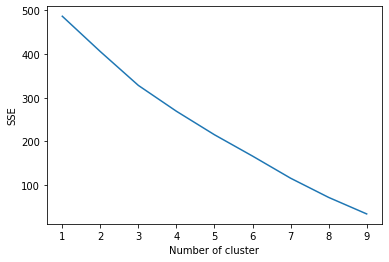

In [ ]:
# Elbow method 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
elbow_method = {}
for k in range(1, 10):
  kmeans_elbow = KMeans(n_clusters=k).fit(cv_tedfeatures)
  elbow_method[k] = kmeans_elbow.inertia_
plt.figure()
plt.plot(list(elbow_method.keys()), list(elbow_method.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Silhouette method 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for n_cluster in range(2, 10):
  kmeans = KMeans(n_clusters=n_cluster).fit(cv_tedfeatures)
  label = kmeans.labels_
  sil_coeff = silhouette_score(cv_tedfeatures, label, metric='euclidean')
  print(f"For n_clusters={n_cluster}, The Silhouette Coefficient is {sil_coeff}")

For n_clusters=2, The Silhouette Coefficient is 0.05909389105900096
For n_clusters=3, The Silhouette Coefficient is 0.06612357145683898
For n_clusters=4, The Silhouette Coefficient is 0.011905978879828636
For n_clusters=5, The Silhouette Coefficient is 0.03524973495885201
For n_clusters=6, The Silhouette Coefficient is 0.03389646558179478
For n_clusters=7, The Silhouette Coefficient is 0.03239078472322965
For n_clusters=8, The Silhouette Coefficient is 0.030419304786093983
For n_clusters=9, The Silhouette Coefficient is 0.0042727099432998406


### **TF-IDF as features**

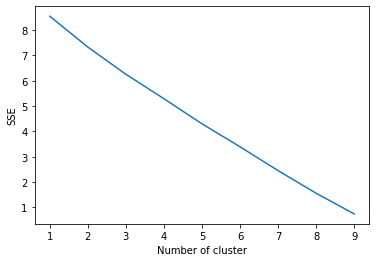

In [ ]:
# Elbow method 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
elbow_method = {}
for k in range(1, 10):
  kmeans_elbow = KMeans(n_clusters=k).fit(tv_tedfeatures)
  elbow_method[k] = kmeans_elbow.inertia_
plt.figure()
plt.plot(list(elbow_method.keys()), list(elbow_method.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Silhouette method 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for n_cluster in range(2, 10):
  kmeans = KMeans(n_clusters=n_cluster).fit(tv_tedfeatures)
  label = kmeans.labels_
  sil_coeff = silhouette_score(cv_tedfeatures, label, metric='euclidean')
  print(f"For n_clusters={n_cluster}, The Silhouette Coefficient is {sil_coeff}")

For n_clusters=2, The Silhouette Coefficient is 0.047257637963629306
For n_clusters=3, The Silhouette Coefficient is 0.03532328315479835
For n_clusters=4, The Silhouette Coefficient is 0.053771569159734835
For n_clusters=5, The Silhouette Coefficient is 0.03407575302246654
For n_clusters=6, The Silhouette Coefficient is 0.02504314381813117
For n_clusters=7, The Silhouette Coefficient is 0.021510675877519182
For n_clusters=8, The Silhouette Coefficient is -0.024882694140998102
For n_clusters=9, The Silhouette Coefficient is -0.0015142821880752139


### **Clustering Mode**l

In [11]:
# define how many clusters K-means will generate
NUMBER_OF_CLUSTERS = 4
RANDOM_STATE = 20
kmeans = KMeans(n_clusters=NUMBER_OF_CLUSTERS).fit(tv_tedfeatures)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of cluster {kmeans.n_clusters} \nNumber of elements asigned to each cluster: {cluster_sizes} ")

Number of cluster 4 
Number of elements asigned to each cluster: [4 3 1 2] 


In [12]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print(f'\nCluster {i}')
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [13]:
clusters = KMeans(n_clusters=NUMBER_OF_CLUSTERS, random_state=RANDOM_STATE).fit_predict(tv_tedfeatures)
get_top_keywords(tv_tedfeatures, clusters, tv.get_feature_names_out(), 10)


Cluster 0
prazo,correios,automático,devolver,código,dinheiro,dias,devolução,ainda,produto

Cluster 1
site,amazon,consigo,telefone,cadastro,opção,tudo,número,conta,cancelar

Cluster 2
seguinte,nova,sendo,ok,recebe,entregador,fazer,vieram,dia,entrega

Cluster 3
digital,deste,cobrando,cobrado,itens,venho,assinatura,cobrança,ar,valor


### **PCA and TSNE**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=tv_tedfeatures.shape[0], replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=2).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=tv_tedfeatures.shape[0], replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tv_tedfeatures, clusters)

In [14]:
ted_segmentaion = {'body':  df['body'] , 'cluster': kmeans.labels_.tolist()}
clusters_df = pd.DataFrame(ted_segmentaion)
clusters_df['cluster'] = kmeans.labels_.tolist()
clusters_df.head()


,body,cluster
0,olá preciso ajuda entender problema recebi ema...,1
1,comprei perfume recebi produto vale nada cheir...,0
2,novamente casa terminei assistir serie anéis p...,1
3,fiz assinatura amazon prime video valor ar v...,1
4,prezados te hot conta amazon fiz compras anter...,3


### **Visualization of clusters**

In [ ]:
%%capture
# cluster 1 visualization
from wordcloud import WordCloud, STOPWORDS
def generate_wordcloud_by_cluster(index, cluster):
# Mono Gram
  wordcloud = WordCloud(max_font_size=50, max_words=20, collocations = False).generate_from_text(' '.join(cluster['body']))
  
  # save wordcloud
  # Save wordcloud 
  if not os.path.exists("wordclouds/clusters/"):
    os.makedirs("wordclouds/clusters/")
  wordcloud.to_file(f'wordclouds/clusters/{index}_cluster_wordcloud.png')
  
  # Generate plot
  plt.figure(figsize=(8,3))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

# generate wordcloud for the first two clusters
for index in range(2):
  cluster = clusters_df[clusters_df.cluster == index]
  generate_wordcloud_by_cluster(index,cluster)

## **Topic Modeling**

### **Create a dictionary using the bag of words model**
- Document: some text.
- Corpus: a collection of documents.

In [68]:
def preprocess_data(doc_set):
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    pt_stop = set(stopwords.words('portuguese'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = SnowballStemmer(language = 'portuguese')
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens 
        stopped_tokens = [i for i in tokens if not i in pt_stop ]
        # remove short words
        stopped_tokens = [i for i in tokens if len(i) > 2]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [25]:
def prepare_corpus(doc_clean):
    # associate each word in the corpus with a unique integer ID.
    dictionary = corpora.Dictionary(doc_clean)
    
    # create the bag-of-word representation for documents (corpus)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

    return dictionary,doc_term_matrix

### **Latent Dirichlet Allocation (LDA) model**

In [31]:
from gensim import models
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric, ConvergenceMetric, CoherenceMetric

def create_gensim_lda_model(doc_clean, number_topics, words, iterations, passes):
  
  dictionary, doc_term_matrix = prepare_corpus(doc_clean) 

  # train model
  lda_model = models.ldamodel.LdaModel(doc_term_matrix,
            id2word=dictionary,
            num_topics=num_topics,
            iterations=iterations,
            passes=passes)
  
  print(lda_model.print_topics(num_topics=number_topics, num_words=words))

  return lda_model

In [34]:
def save_model(path, cluster_id, lda_model, passes=1, interations=50):
   # Save models so they aren't lost
  if not os.path.exists(f"{path}model_{iterations}i{passes}p_cluster{cluster_id}/"):
    os.makedirs(f"{path}model_{iterations}i{passes}p_cluster{cluster_id}/")

  lda_model.save(f"{path}model_{iterations}i{passes}p_cluster{cluster_id}/model_{iterations}i{passes}p.model")
    
  print(f'Model saved at: ./{path}model_{iterations}i{passes}p_cluster{cluster_id}/model_{iterations}i{passes}p.model')

In [18]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary) 
        model_list.append(model)
        coherencemodel = models.CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [19]:
def plot_graph(doc_clean, start, stop, step):
    
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [116]:
def save_topics_plot(dir, cluster_id, model):
  dictionary, doc_term_matrix = prepare_corpus(doc_clean)
  vis = gensimvis.prepare(model, doc_term_matrix, dictionary)
  
  if not os.path.exists(f'{dir}'):
    os.makedirs(f'{dir}')
  pyLDAvis.save_html(vis, f'{dir}topics_cluster_{index}.html')
  print(f'Visualization saved at: {dir}topics_cluster_{index}.html')

[(0, '0.043*"produt" + 0.030*"dinheir" + 0.030*"dias" + 0.030*"ligaçã" + 0.030*"ute" + 0.030*"aspir" + 0.030*"carreg" + 0.016*"quer" + 0.016*"volt" + 0.016*"acer"'), (1, '0.009*"amazon" + 0.009*"dinheir" + 0.009*"compr" + 0.009*"produt" + 0.009*"aind" + 0.009*"devolu" + 0.009*"quer" + 0.009*"volt" + 0.009*"automát" + 0.009*"receb"'), (2, '0.053*"aind" + 0.053*"produt" + 0.029*"amazon" + 0.029*"compr" + 0.029*"automát" + 0.029*"enderec" + 0.029*"entreg" + 0.029*"cancel" + 0.029*"consegu" + 0.029*"transport"'), (3, '0.047*"produt" + 0.038*"receb" + 0.038*"devolu" + 0.029*"devolv" + 0.029*"códig" + 0.029*"dias" + 0.020*"compr" + 0.020*"dentr" + 0.020*"previst" + 0.020*"praz"'), (4, '0.009*"amazon" + 0.009*"dinheir" + 0.009*"compr" + 0.009*"produt" + 0.009*"aind" + 0.009*"devolu" + 0.009*"quer" + 0.009*"volt" + 0.009*"automát" + 0.009*"receb"')]
Model saved at: .//models/lda//model_100i1p_cluster0/model_100i1p.model


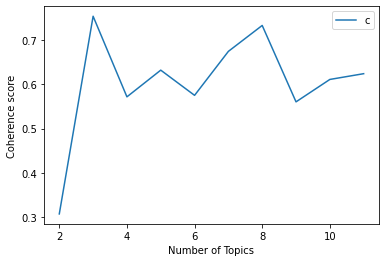

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Visualization saved at: topics/lda_topics_cluster_0.html
[(0, '0.011*"fiz" + 0.011*"valor" + 0.011*"cobranc" + 0.011*"prim" + 0.011*"digital" + 0.011*"send" + 0.011*"cartã" + 0.011*"receb" + 0.011*"dest" + 0.011*"assinatur"'), (1, '0.060*"valor" + 0.060*"ar" + 0.041*"amazon" + 0.041*"assinatur" + 0.041*"cobr" + 0.041*"venh" + 0.022*"fiz" + 0.022*"send" + 0.022*"prim" + 0.022*"digital"'), (2, '0.034*"cobranc" + 0.034*"contrat" + 0.019*"anual" + 0.019*"televisã" + 0.019*"pod" + 0.019*"outr" + 0.019*"educ" + 0.019*"apen" + 0.019*"assim" + 0.019*"víd"'), (3, '0.011*"fiz" + 0.011*"valor" + 0.011*"receb" + 0.011*"dest" + 0.011*"send" + 0.011*"prim" + 0.011*"cartã" + 0.011*"digital" + 0.011*"cobranc" + 0.011*"amazon"'), (4, '0.060*"valor" + 0.041*"cobr" + 0.041*"itens" + 0.041*"precis" + 0.041*"pag" + 0.041*"ar" + 0.022*"fiz" + 0.022*"cartã" + 0.022*"receb" + 0.022*"dest"')]
Model saved at: .//models/lda//model_100i1p_cluster1/model_100i1p.model


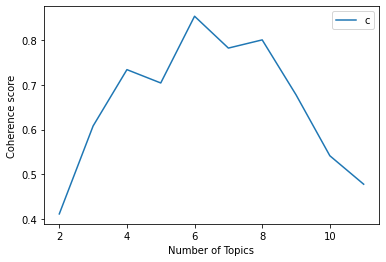

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Visualization saved at: topics/lda_topics_cluster_1.html
[(0, '0.147*"entreg" + 0.076*"dia" + 0.058*"vier" + 0.040*"receb" + 0.040*"faz" + 0.040*"ok" + 0.040*"send" + 0.022*"pois" + 0.022*"transport" + 0.022*"ped"'), (1, '0.030*"previsã" + 0.030*"question" + 0.030*"pass" + 0.030*"ped" + 0.030*"pois" + 0.030*"porém" + 0.030*"amazon" + 0.030*"produt" + 0.030*"transport" + 0.030*"seguint"'), (2, '0.030*"previsã" + 0.030*"question" + 0.030*"pass" + 0.030*"ped" + 0.030*"pois" + 0.030*"porém" + 0.030*"amazon" + 0.030*"produt" + 0.030*"transport" + 0.030*"seguint"'), (3, '0.030*"previsã" + 0.030*"question" + 0.030*"pass" + 0.030*"ped" + 0.030*"pois" + 0.030*"porém" + 0.030*"amazon" + 0.030*"produt" + 0.030*"transport" + 0.030*"seguint"'), (4, '0.030*"previsã" + 0.030*"question" + 0.030*"pass" + 0.030*"ped" + 0.030*"pois" + 0.030*"porém" + 0.030*"amazon" + 0.030*"produt" + 0.030*"transport" + 0.030*"seguint"')]
Model saved at: .//models/lda//model_100i1p_cluster2/model_100i1p.model


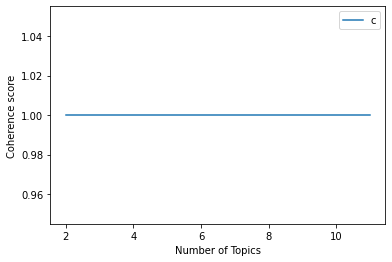

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Visualization saved at: topics/lda_topics_cluster_2.html
[(0, '0.056*"cont" + 0.056*"númer" + 0.039*"amazon" + 0.039*"acess" + 0.039*"compr" + 0.039*"consig" + 0.039*"cadastr" + 0.039*"telefon" + 0.021*"prez" + 0.021*"hot"'), (1, '0.017*"cont" + 0.017*"outr" + 0.017*"amazon" + 0.017*"fiz" + 0.017*"anterior" + 0.017*"gost" + 0.017*"precis" + 0.017*"solicit" + 0.017*"númer" + 0.017*"possu"'), (2, '0.017*"fiz" + 0.017*"outr" + 0.017*"amazon" + 0.017*"cont" + 0.017*"inform" + 0.017*"li" + 0.017*"inic" + 0.017*"mês" + 0.017*"algo" + 0.017*"aqu"'), (3, '0.141*"cancel" + 0.043*"assinatur" + 0.043*"cobr" + 0.043*"tud" + 0.043*"opçã" + 0.024*"outr" + 0.024*"fiz" + 0.024*"discovery" + 0.024*"ado" + 0.024*"tod"'), (4, '0.017*"cancel" + 0.017*"fiz" + 0.017*"outr" + 0.017*"amazon" + 0.017*"cont" + 0.017*"opçã" + 0.017*"tud" + 0.017*"inic" + 0.017*"vem" + 0.017*"inform"')]
Model saved at: .//models/lda//model_100i1p_cluster3/model_100i1p.model


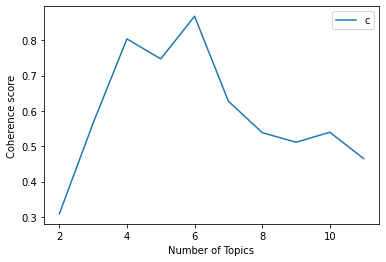

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Visualization saved at: topics/lda_topics_cluster_3.html


In [64]:
num_topics = 5
iterations = 100
passes = 50
words=10

for index in range(kmeans.n_clusters):
  cluster = clusters_df[clusters_df.cluster == index]
  doc_clean = preprocess_data(cluster.body)
  model = create_gensim_lda_model(doc_clean, num_topics, words, iterations, passes)
  save_model('models/lda/', index, model)

  # plot coherence score
  start,stop,step=2,12,1
  plot_graph(doc_clean, start, stop, step)

  # generate topic plot and save it
  save_topics_plot(index, model)



In [65]:
# show cluster 1 topics
IPython.display.HTML(filename='topics/lda_topics_cluster_1.html')

### **Latent Semantic Analysis (LSA) model** 

In [35]:
def create_gensim_lsa_model(doc_clean, numb_topics, words):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    lsamodel = models.LsiModel(doc_term_matrix, num_topics=numb_topics, id2word = dictionary)  
    print(lsamodel.print_topics(num_topics=numb_topics, num_words=words))
    return lsamodel

In [47]:
def compute_lsa_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = models.LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  
        model_list.append(model)
        coherencemodel = models.CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [43]:
def plot_lsa_graph(doc_clean, start, stop, step):
    dictionary, doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_lsa_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:
num_topics = 5
iterations = 100
passes = 50
words=10
for index in range(kmeans.n_clusters):
  cluster = clusters_df[clusters_df.cluster == index]
  doc_clean = preprocess_data(cluster.body)
  model = create_gensim_lsa_model(doc_clean, num_topics, words)
  save_model('models/lsa/', index, model)

  # plot coherence score
  start,stop,step=2,12,1
  plot_lsa_graph(doc_clean, start, stop, step)

  # generate topic plot and save it
  # save_topics_plot(index, model)

### **Hierarchical Dirichlet Process, HDP** 

In [105]:
def create_gensim_hdp_model(doc_clean, num_topics, words):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model = models.HdpModel(doc_term_matrix, id2word=dictionary)
    print(model.print_topics(num_topics=num_topics, num_words=words))
    return model

In [93]:
def compute_hdp_coherence_values(dictionary, doc_term_matrix, doc_clean):
    model = models.HdpModel(doc_term_matrix, id2word=dictionary)
    coherencemodel = models.CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_value = coherencemodel.get_coherence()
    return model, coherence_value

In [113]:
def plot_hdp_graph(doc_clean):
    dictionary, doc_term_matrix=prepare_corpus(doc_clean)
    model, coherence_value = compute_hdp_coherence_values(dictionary, doc_term_matrix,doc_clean)
    # Show graph
    plt.plot(x, coherence_value)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [117]:
num_topics = 4
words = 10
for index in range(kmeans.n_clusters):
  cluster = clusters_df[clusters_df.cluster == index]
  doc_clean = preprocess_data(cluster.body)
  model = create_gensim_hdp_model(doc_clean, num_topics, words)
  save_model('models/hdp/', index, model)

   # plot coherence score
  #plot_hdp_graph(doc_clean)

  # generate topic plot and save it
  save_topics_plot('topics/hdp/', index, model)

[(0, '0.034*ped + 0.032*tod + 0.032*porém + 0.031*neg + 0.026*quer + 0.026*recolh + 0.026*dinheir + 0.024*volt + 0.023*possível + 0.022*tent'), (1, '0.036*embal + 0.035*legisl + 0.031*inform + 0.028*atend + 0.026*manhã + 0.025*amazon + 0.024*devolu + 0.023*amanh + 0.022*correi + 0.020*moiment'), (2, '0.043*roup + 0.041*contr + 0.039*receb + 0.037*tod + 0.032*inform + 0.031*cancel + 0.029*total + 0.028*dinheir + 0.027*legal + 0.026*ped'), (3, '0.047*sei + 0.034*dentr + 0.028*brinqued + 0.027*neg + 0.022*amazon + 0.022*cancel + 0.022*tent + 0.021*autoriz + 0.021*aza + 0.021*automát')]
Model saved at: ./models/hdp//model_100i1p_cluster0/model_100i1p.model


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Visualization saved at: topics/hdp/topics_cluster_0.html
[(0, '0.052*mês + 0.044*pag + 0.033*verific + 0.031*bloqu + 0.031*nenhum + 0.031*ado + 0.025*retorn + 0.025*uns + 0.025*quaisqu + 0.025*itens'), (1, '0.048*motiv + 0.030*retorn + 0.028*pud + 0.028*aqu + 0.025*conteúd + 0.025*cartã + 0.024*verific + 0.023*certez + 0.023*itens + 0.021*indevid'), (2, '0.050*aqu + 0.050*cobr + 0.044*porém + 0.038*assist + 0.038*ané + 0.034*outr + 0.032*contrat + 0.032*envi + 0.028*cartã + 0.027*problem'), (3, '0.038*valor + 0.036*vid + 0.036*venh + 0.034*cobranc + 0.033*outr + 0.032*ado + 0.031*amazon + 0.030*tard + 0.027*pagu + 0.026*dest')]
Model saved at: ./models/hdp//model_100i1p_cluster1/model_100i1p.model


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Visualization saved at: topics/hdp/topics_cluster_1.html
[(0, '0.099*entreg + 0.071*dia + 0.059*send + 0.059*ped + 0.048*vier + 0.045*dialog + 0.045*question + 0.038*receb + 0.035*cas + 0.035*ambos'), (1, '0.157*nov + 0.080*fiz + 0.077*nad + 0.070*meu + 0.067*entreg + 0.066*encerr + 0.055*pass + 0.042*recus + 0.038*cancel + 0.035*previsã'), (2, '0.085*encerr + 0.070*seguint + 0.063*dialog + 0.062*produt + 0.059*meu + 0.056*receb + 0.055*simples + 0.041*ambos + 0.039*pass + 0.039*amazon'), (3, '0.164*cancel + 0.127*ambos + 0.085*compr + 0.078*encerr + 0.062*amazon + 0.055*seguint + 0.054*meu + 0.047*recus + 0.045*previsã + 0.039*aond')]
Model saved at: ./models/hdp//model_100i1p_cluster2/model_100i1p.model


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Visualization saved at: topics/hdp/topics_cluster_2.html
[(0, '0.071*pod + 0.050*cancel + 0.038*consig + 0.033*moment + 0.032*discovery + 0.030*aqu + 0.029*amazon + 0.026*acess + 0.024*telefon + 0.024*updat'), (1, '0.090*gost + 0.061*moment + 0.059*compr + 0.048*tod + 0.045*tud + 0.039*verific + 0.037*algo + 0.036*cont + 0.030*telefon + 0.028*educ'), (2, '0.062*brasil + 0.050*inic + 0.050*cadastr + 0.046*gost + 0.042*possu + 0.036*daqu + 0.035*algo + 0.034*fiz + 0.034*alemanh + 0.032*celul'), (3, '0.077*vier + 0.073*tod + 0.052*acess + 0.052*opçã + 0.049*prez + 0.046*reclam + 0.037*educ + 0.034*tent + 0.034*pois + 0.034*fiz')]
Model saved at: ./models/hdp//model_100i1p_cluster3/model_100i1p.model


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Visualization saved at: topics/hdp/topics_cluster_3.html


In [119]:
# show cluster 1 topics
IPython.display.HTML(filename='topics/hdp/topics_cluster_0.html')

### **Bertopic**

In [125]:
%%capture
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.6 MB/s 
     |████████████████████████████████| 5.2 MB 27.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 4.7 MB/s 
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 636 kB 53.3 MB/s 
     |████████████████████████████████| 1.3 MB 57.2 MB/s 
     |████████████████████████████████| 1.1 MB 67.3 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340270 sha256=31de1e4185fb0a345e5d64ef700d79944aaad9c44a6371b6e619374ccab0342b
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=

In [126]:
from bertopic import BERTopic

In [155]:
# create model 
model = BERTopic(verbose=False)

In [156]:
# train model
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']
topics, probabilities = model.fit_transform(docs)

KeyboardInterrupt: ignored

In [147]:
print(topics)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [148]:
# get the topic frequency
model.get_topic_freq().head(11)

,Topic,Count
0,-1,10


In [149]:
# get one topic
model.get_topic(0)

False

In [150]:
model.visualize_barchart(topics)

### **Topic similarities**

In [141]:
model.visualize_heatmap(topics)

### **Bertopic prediction**

In [ ]:
topics, probs = model.transform(new_docs)

### **BERTimbau**

In [ ]:
%%capture
!pip install transformers

In [122]:
from transformers import AutoModel, AutoTokenizer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [152]:
# BERT Base
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [153]:
topics, probabilities = model.fit_transform(df['body'].tolist())

AttributeError: ignored

In [124]:
num_topics = 4
words = 10
for index in range(kmeans.n_clusters):
  cluster = clusters_df[clusters_df.cluster == index]
  doc_clean = preprocess_data(cluster.body)
  dictionary, doc_term_matrix=prepare_corpus(doc_clean)
  topics, probabilities = model.train

Could not estimate the number of tokens of the input, floating-point operations will not be computed


### **Texblob**

In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
def get_blob_sentiment(sentence):
  blob = TextBlob(sentence).sentiment
  return blob.polarity

### **Vader**

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
def get_vader_sentiment(sentence):
  vader = sid.polarity_scores(sentence)
  return vader['compound']

In [ ]:
df['TextBlob'] = df['body'].apply(lambda sentence: get_blob_sentiment(sentence))
df['Vader'] = df['body'].apply(lambda sentence: get_vader_sentiment(sentence))

A negative sentiment score means 
negative sentiment, and a positive sentiment score means positive sentiment. The higher 
the absolute value of the score, the more confident the system is about it

In [ ]:
df.head(10)

### **Clustering sentences with K-Means**

In [ ]:
import re
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split

## **Save Models to Google Cloud Storage**

In [ ]:
# import google cloud dependencies
#from google.colab import auth
#import uuid # for generate a unique identification for google bucket
# Define a project id in google cloud
#project_id = '<project_ID>'

#auth.authenticate_user()
# configure gsutil
## !gcloud config set project {project_id}
# set bucket name
##backet_name = f'sample-bucket-{uuid.uuid1()}'
## !gsuit mb gs://{bucket_name}

In [ ]:
# upload model to Google Cloud Storage
#!gsuit cp /tmp/name_of_file.txt gs://{bucket_name}/

# location of model
#download_location = f"https://console.cloud.google.com/storage/browser?project={project_id}"

# donwload model from Google Cloud Storage
#!gsuit cp gs://{bucket_name}/{filename} {download_location}

## **References**


[LangDetect](https://pypi.org/project/langdetect/) <br/>
[Diagrams](https://pypi.org/project/diagrams/) <br/>
[Graphviz](https://pypi.org/project/graphviz/) <br/>
[Beautifulsoap4](https://pypi.org/project/beautifulsoup4/) <br/>
[OpLexicon](https://www.inf.pucrs.br/linatural/wordpress/recursos-e-ferramentas/oplexicon/)